In [22]:
import json
import matplotlib.pyplot as plt
import glob

def plot(subplot_idx, L1, L2, title, xlabel='epoch', legend_list=['train','valid'], xlim=None, ylim=None):
    plt.subplot(*subplot_idx)
    plt.plot(L1)
    plt.plot(L2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.legend(labels=legend_list)
    plt.xlim(*xlim) if xlim else None
    plt.ylim(*ylim) if ylim else None

def plot_history(path, xlim=None):
    D = json.load(open(path,'r'))
    plt.figure(figsize=(6*3,4))
    plot((1,3,1), D['train_loss'], D['valid_loss'], 'loss', xlim=xlim)
    plot((1,3,2), D['train_f1'], D['valid_f1'], 'f1', xlim=xlim)
    plot((1,3,3), D['train_map'], D['valid_map'], 'map', xlim=xlim)
    plt.show()
    print("max_valid_map=", max(D['valid_map']), ", at_epoch=", D['valid_map'].index(max(D['valid_map'])))

{'mode': 'train', 'batch_size': 16, 'output_dim': 75, 'fine_dim': 11, 'coarse_dim': 7, 'resume': '', 'epochs': 500, 'results': './results/exp1', 'threshold_opt': False, 'backbone': 'resnet50', 'pretrained': True, 'lambda_const': 1, 'optim_algo': 'adamw'}


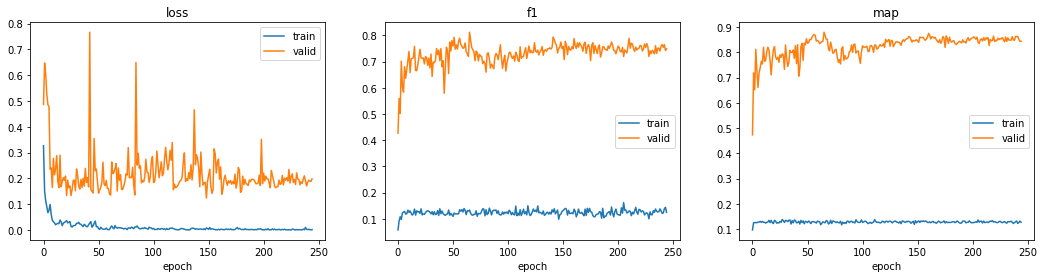

max_valid_map= 0.8790266313680415 , at_epoch= 65


In [18]:
print( json.load(open("./results/exp1/args_train.json","r")) ) # train2
plot_history("./results/exp1/history_train.json", (None,None))

{'mode': 'train', 'batch_size': 16, 'output_dim': 92, 'fine_dim': 11, 'coarse_dim': 7, 'resume': '', 'epochs': 500, 'results': './results/exp2', 'threshold_opt': False, 'backbone': 'resnet50', 'pretrained': True, 'lambda_const': 1, 'optim_algo': 'adamw'}


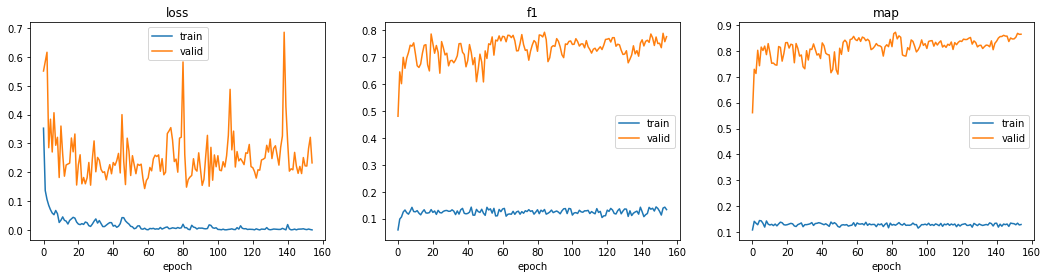

max_valid_map= 0.871662033720959 , at_epoch= 82


In [19]:
print( json.load(open("./results/exp2/args_train.json","r")) ) # train3
plot_history("./results/exp2/history_train.json", (None,None))

{'mode': 'train', 'batch_size': 16, 'output_dim': 24, 'fine_dim': 11, 'coarse_dim': 7, 'resume': '', 'epochs': 500, 'results': './results/exp3_derm_train', 'threshold_opt': False, 'backbone': 'resnet50', 'pretrained': True, 'lambda_const': 1, 'optim_algo': 'adamw'}


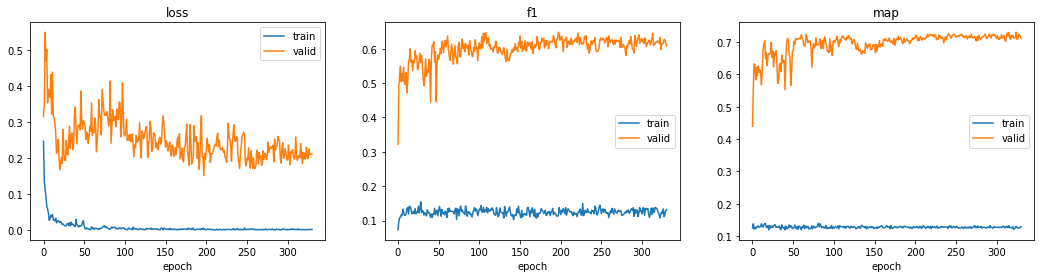

max_valid_map= 0.730773075529044 , at_epoch= 324


In [20]:
print( json.load(open("./results/exp3_derm_train/args_train.json","r")) ) # train3
plot_history("./results/exp3_derm_train/history_train.json", (None,None))

{'mode': 'train', 'batch_size': 16, 'output_dim': 24, 'fine_dim': 11, 'coarse_dim': 7, 'resume': '', 'epochs': 500, 'results': './results/exp1', 'threshold_opt': False, 'backbone': 'resnet50', 'pretrained': True, 'lambda_const': 1, 'optim_algo': 'adamw'}


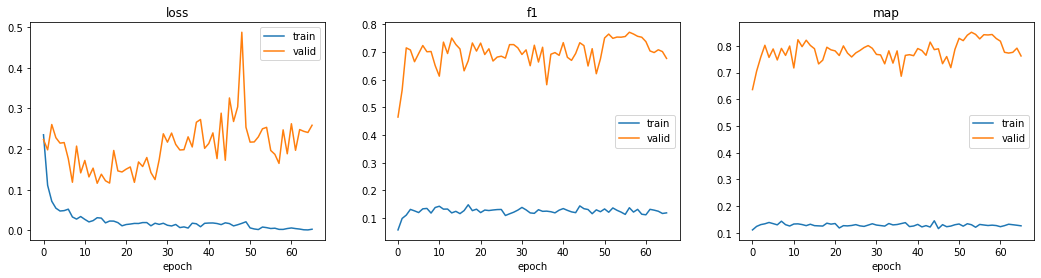

max_valid_map= 0.8513044566711326 , at_epoch= 53


In [4]:
print( json.load(open("./results/exp1_res_out24_adamw_ep65/args_train.json","r")) ) # train2
plot_history("./results/exp1_res_out24_adamw_ep65/history_train.json", (None,None))

{'mode': 'train', 'batch_size': 16, 'output_dim': 12, 'fine_dim': 11, 'coarse_dim': 7, 'resume': '', 'epochs': 500, 'results': './results/exp2', 'threshold_opt': False, 'backbone': 'resnet50', 'pretrained': True, 'lambda_const': 1, 'optim_algo': 'adamw'}


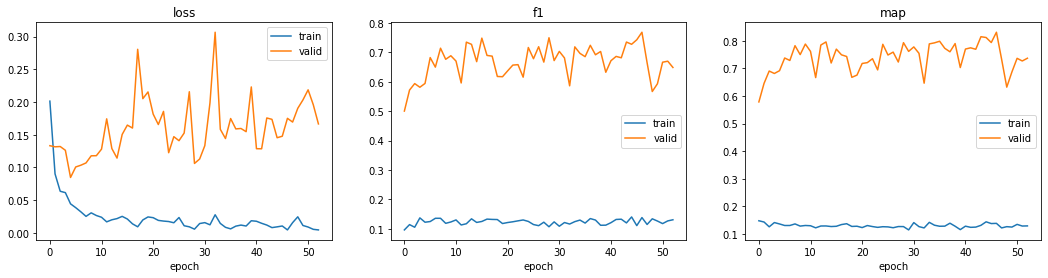

max_valid_map= 0.8309182658329894 , at_epoch= 46


In [2]:
print( json.load(open("./results/exp2/args_train.json","r")) ) # train4
plot_history("./results/exp2/history_train.json", (None,None))

{'mode': 'train', 'batch_size': 16, 'output_dim': 24, 'fine_dim': 7, 'coarse_dim': 7, 'resume': '', 'epochs': 500, 'results': './results/exp1', 'threshold_opt': False, 'backbone': 'resnet50', 'pretrained': True, 'lambda_const': 0, 'optim_algo': 'adamw'}


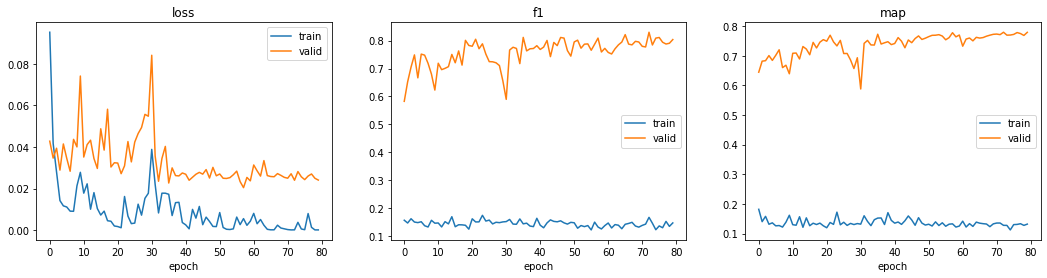

max_valid_map= 0.7790214695617311 , at_epoch= 72


0.8902857142857143

In [5]:
print( json.load(open("./in_only/results/exp1_res_out24_adamw_ep80/args_train.json","r")) ) # train3
plot_history("./in_only/results/exp1_res_out24_adamw_ep80/history_train.json", (None,None))
0.779*8/7

In [ ]:
# first stage
    # valid: Dermnet -> in-class # OK
    # train: more absention classes
# second stage
    # optimizer
    # lr-scheduler

In [35]:
for path in glob.glob("./results/exp*/history_train.json"):
    print(path.split('/')[-2])
    D = json.load(open(path,'r'))
    ep = D['valid_map'].index(max(D['valid_map']))
    in_map, out_ap = round(sum(D['valid_aps'][ep][:-1])/7, 3), round(D['valid_aps'][ep][-1], 3)
    print(in_map, out_ap)

exp1_res_out24_adamw_ep65
0.842 0.917
exp2_res_out12_adamw_ep50
0.818 0.919
exp1_res_out41_adamw_ep110
0.845 0.922
exp0_res_out58_adamw_ep140
0.879 0.927
exp0_vit_out24_adamw_ep50
0.765 0.899
exp1_res_out24_adamline200_ep100
0.856 0.931
exp2_res_out24_adamsine200_ep180
0.885 0.927
exp3_derm_train
0.712 0.862
exp1_res_out75_adamw_ep65
0.874 0.914
exp2_res_out92_adamw_ep85
0.863 0.93


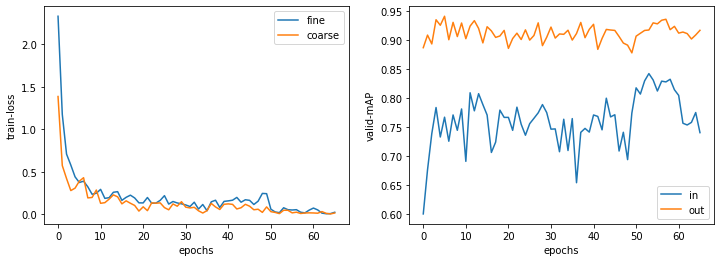

In [46]:
D = json.load(open("./results/exp1_res_out24_adamw_ep65/history_train.json",'r'))
ap = [ (sum(l[:-1])/7,l[-1]) for l in D['valid_aps'] ]
in_ap, ou_ap = zip(*ap)

lf = json.load(open("./results/exp1_res_out24_adamw_ep65/lf.json",'r'))
lc = json.load(open("./results/exp1_res_out24_adamw_ep65/lc.json",'r'))

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(lf, label='fine')
plt.plot(lc, label='coarse')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('train-loss')

plt.subplot(1,2,2)
plt.plot(in_ap, label='in')
plt.plot(ou_ap, label='out')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('valid-mAP')

plt.show()